# Part I : Data collection

In [585]:
file = open("bmci.aspx", "rt") 
bmci = file.read()         
file.close()

file = open("boa.aspx", "rt") 
boa = file.read()         
file.close()    

file = open("tijari.aspx", "rt") 
tijari = file.read()         
file.close()    

file = open("cih.aspx", "rt") 
cih = file.read()         
file.close()    

file = open("bcp.aspx", "rt") 
bcp = file.read()         
file.close()  

In [593]:
import csv 
from bs4 import BeautifulSoup

def aspx_to_csv(name_aspx):
    file = open(name_aspx, "rt") 
    read_file = file.read()         
    file.close()
    
    file_soup = BeautifulSoup(read_file)
    find_all = file_soup.find_all("span")
    max_len = len(find_all)
    
    lst = []
    for i in range(0,max_len,6):
           lst.append([find_all[i].get_text(),
                       float(find_all[i+1].get_text().replace(',','.')),
                       float(find_all[i+2].get_text().replace(',','.')),
                       float(find_all[i+3].get_text().replace(',','.')),
                       float(find_all[i+4].get_text().replace(',','.')),
                       float(find_all[i+5].get_text().replace(',','.'))])
    #30.8 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
    
    cols= ['date','closing','adjusted','evolution','quantity','volume']
    name = name_aspx.replace('.aspx','')
    with open(name+'_csv.csv', 'w') as f: 
        csv_writer = csv.writer(f)
        csv_writer.writerow(cols)
        csv_writer.writerows(lst)
            

In [586]:
from bs4 import BeautifulSoup

bmci = BeautifulSoup(bmci)
boa = BeautifulSoup(boa)
tijari = BeautifulSoup(tijari)
cih = BeautifulSoup(cih)
bcp = BeautifulSoup(bcp)

In [587]:
#bcp.find_all("span")

In [588]:
print(bcp.find_all("span")[144].get_text())

09/12/2022


In [589]:
max_len = len(bcp.find_all("span"))
max_len

4524

In [590]:
%%timeit
bcp_find_all = bcp.find_all("span")
bcp_lst = []

for i in range(0,max_len,6):
       bcp_lst.append([bcp_find_all[i].get_text(),
                       float(bcp_find_all[i+1].get_text().replace(',','.')),
                       float(bcp_find_all[i+2].get_text().replace(',','.')),
                       float(bcp_find_all[i+3].get_text().replace(',','.')),
                       float(bcp_find_all[i+4].get_text().replace(',','.')),
                       float(bcp_find_all[i+5].get_text().replace(',','.'))])
        

13.7 ms ± 863 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [591]:
import csv 

In [592]:
cols= ['date','closing','adjusted','evolution','quantity','volume']
with open('bcp_csv.csv', 'w') as f: 
    csv_writer = csv.writer(f)
    csv_writer.writerow(cols)
    csv_writer.writerows(bcp_lst)
    

In [594]:
%%timeit
name = "bcp.aspx"
aspx_to_csv(name)

176 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Stock:
 
    def __init__(self,name):
        self.name = name
        aspx_to_csv(name+".aspx")
        self.data = pd.read_csv(name+'_csv.csv')
        
    def graph(self,m,nsma):
        
        ''' this an instance method that graphs volumes in bars and value'''
        
        fig, ax1 = plt.subplots(figsize=(8, 8))
        ax2 = ax1.twinx()
        ax1.bar(self.data.index,self.data['volume'],color='orange',label='volume')
        ax2.plot(self.data.index,self.data["adjusted"],color='blue',label='value')
        ax1.grid(zorder=0)
        plt.plot(self.momentum(m),color='red',label='Momentum')
        plt.plot(self.sma(nsma),color='green',label='Moving Average')
        plt.legend()
        plt.show()
        
    def maximumValue(self):
        return self.data['adjusted'].max()
    
    def minimumValue(self):
        return self.data['adjusted'].max()
    
    def maximumVolume(self):
        return self.data['volume'].max()
    
    def maximumQuantity(self):
        return self.data['quantity'].max()
  
    def momentum(self,N):
        length = len(self.data)
        if type(N) is list:
            lst = []
            columns=[]
            for j in range(len(N)):
                m = []
                for i in range(0,length):
                    if i < N[j]:
                        continue
                    else:
                        m.append(self.data['closing'][i] - self.data['closing'][i-N[j]])
                
                lst.append(m)
            df = pd.DataFrame (lst, )
            return lst
        
        else:
            m= []
            for i in range(0,length):
                if i < N:
                    i=N
                else:
                    m.append(self.data['closing'][i] - self.data['closing'][i-N])
            df = pd.DataFrame (m, columns = ['Momentum N= '+str(N)])
            return df
        
    def sma(self,N): 
        windows = self.data['closing'].rolling(N)

        ma = windows.mean()

        malst = ma.tolist()
        lst = malst[N - 1:]
            
        return lst   
        
stock = Stock("bcp")
stock.data.head(6)

,date,closing,adjusted,evolution,quantity,volume
0,13/01/2023,215.00,215.00,0.00,3428.0,742280.40
1,12/01/2023,215.00,215.00,4.88,16859.0,3553199.85
2,10/01/2023,205.00,205.00,4.03,24880.0,5058099.50
3,09/01/2023,197.05,197.05,1.26,18577.0,3689281.55
4,06/01/2023,194.60,194.60,-5.99,74525.0,14511149.80
5,05/01/2023,207.00,207.00,-5.91,12245.0,2618064.00


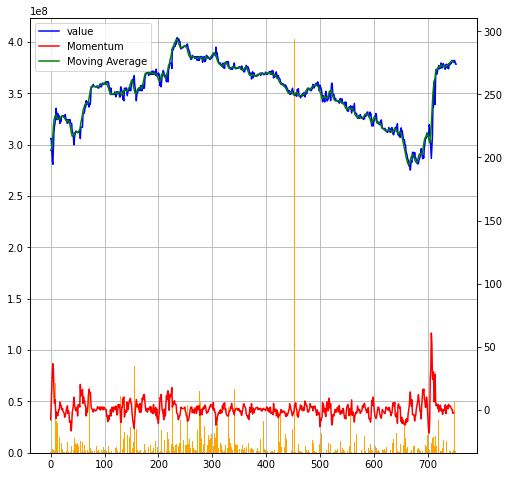

In [603]:
stock.graph(5,6)

In [604]:
print('Maximum Value :',stock.maximumValue())
print('Maximum Value :',stock.minimumValue())
print('Maximum Volume :',stock.maximumVolume())
print('Maximum Quantity :',stock.maximumQuantity())

Maximum Value : 295.0
Maximum Value : 295.0
Maximum Volume : 403307301.8
Maximum Quantity : 1616442.0


In [605]:
stock.momentum(3).head(5)

,Momentum N= 3
0,-17.95
1,-20.40
2,2.00
3,22.95
4,30.30


In [600]:
stock.sma(30)

[226.04166666666666,
 226.5366666666667,
 226.93666666666667,
 227.77,
 228.80166666666668,
 229.98166666666668,
 230.74833333333336,
 231.08166666666668,
 231.15,
 231.14666666666665,
 231.01333333333332,
 230.38166666666666,
 229.88166666666666,
 229.47833333333332,
 228.64833333333334,
 228.11499999999998,
 227.64833333333334,
 227.215,
 227.015,
 226.675,
 226.39166666666668,
 225.99166666666667,
 225.56,
 225.12666666666667,
 224.69333333333333,
 224.36,
 223.76166666666666,
 223.46166666666664,
 223.125,
 222.87166666666664,
 222.675,
 222.84666666666666,
 223.11333333333332,
 223.28,
 223.57666666666665,
 223.90999999999997,
 224.2433333333333,
 224.7433333333333,
 225.24499999999998,
 225.815,
 226.34833333333333,
 227.11333333333332,
 227.78,
 228.61666666666667,
 229.68333333333334,
 230.68333333333334,
 231.8816666666667,
 233.07833333333335,
 234.245,
 235.45166666666668,
 236.71666666666667,
 237.93333333333334,
 239.15,
 240.36666666666667,
 241.56666666666666,
 242.7,
 2

In [601]:
N = 30
windows = stock.data['closing'].rolling(N)
print(windows)
ma = windows.mean()
print(ma)
malst = ma.tolist()
print(malst)
lst = malst[N - 1:]
print(lst)

Rolling [window=30,center=False,axis=0,method=single]
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
749    273.158333
750    273.358333
751    273.458333
752    273.583333
753    273.683333
Name: closing, Length: 754, dtype: float64
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 226.04166666666666, 226.5366666666667, 226.93666666666667, 227.77, 228.80166666666668, 229.98166666666668, 230.74833333333336, 231.08166666666668, 231.15, 231.14666666666665, 231.01333333333332, 230.38166666666666, 229.88166666666666, 229.47833333333332, 228.64833333333334, 228.11499999999998, 227.64833333333334, 227.215, 227.015, 226.675, 226.39166666666668, 225.99166666666667, 225.56, 225.12666666666667, 224.69333333333333, 224.36, 223.76166666666666, 223.46166666666664, 223.125, 222.87166666666664, 222.675, 222.84666666666666, 223.11333333333332, 223